In [5]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [21]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

In [22]:
# import the Resnet50 libraries as shown below and add preprocessing layer to the front of Resnet50
# Here we will be using imagenet weights
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

In [23]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [24]:
# dont train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [31]:
# useful for getting number of output classes
folders = glob('Datasets/Train/*')
folders

['Datasets/Train/lamborghini',
 'Datasets/Train/audi',
 'Datasets/Train/mercedes']

In [29]:
x = Flatten()(resnet.output)

In [33]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model= Model(inputs=resnet.input, outputs = prediction)

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [35]:
# tell the model what cost and optimization method to use
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [36]:
# use the Image data Generator to import the image from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [37]:
# make sure you provide the same target size as initiated fro the datset
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [39]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                           target_size = (224, 224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [40]:
# fit the model
# run the cell
r = model.fit_generator(training_set,
                       validation_data = test_set,
                       epochs = 50,
                       steps_per_epoch = len(training_set),
                       validation_steps = len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 52s 26s/step - loss: 3.4469 - accuracy: 0.4531 - val_loss: 15.1251 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 22s 11s/step - loss: 10.2301 - accuracy: 0.3594 - val_loss: 12.4388 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 13s 6s/step - loss: 7.4137 - accuracy: 0.2500 - val_loss: 4.5050 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 12s 6s/step - loss: 3.6396 - accuracy: 0.3281 - val_loss: 3.8823 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 13s 6s/step - loss: 3.6784 - accuracy: 0.3750 - val_loss: 3.4362 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 12s 6s/step - loss: 2.8505 - accuracy: 0.4219 - val_loss: 2.2386 - val_accuracy: 0.2241
Epoch 7/50
2/2 [==============================] - 12s 6s/step - loss: 1.3870 - accuracy: 0.

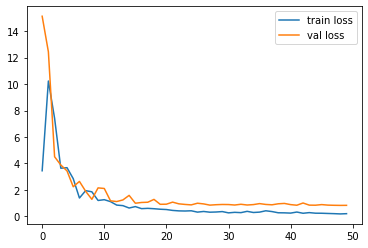

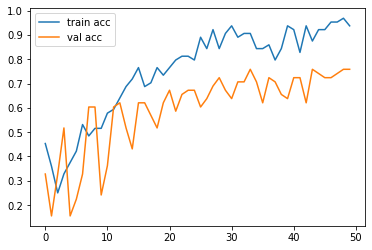

<Figure size 432x288 with 0 Axes>

In [42]:
# plot the loss
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [43]:
# save it as h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [44]:
y_pred = model.predict(test_set)

In [45]:
y_pred

array([[1.48905873e-01, 3.30636352e-01, 5.20457745e-01],
       [2.96488106e-02, 2.91559160e-01, 6.78792000e-01],
       [8.72933641e-02, 4.63473648e-01, 4.49232936e-01],
       [6.56379387e-02, 8.24514702e-02, 8.51910651e-01],
       [7.38995254e-01, 1.74417928e-01, 8.65868032e-02],
       [7.30108295e-04, 7.87474334e-01, 2.11795509e-01],
       [4.89689596e-02, 4.77594316e-01, 4.73436773e-01],
       [1.28056675e-01, 2.63765641e-02, 8.45566750e-01],
       [2.25890920e-01, 5.85724831e-01, 1.88384309e-01],
       [1.11464160e-02, 9.87224936e-01, 1.62862835e-03],
       [7.12089101e-03, 9.66687977e-01, 2.61910614e-02],
       [7.63053745e-02, 5.47460377e-01, 3.76234233e-01],
       [2.33738669e-04, 9.95828092e-01, 3.93809145e-03],
       [1.17236394e-02, 9.28109050e-01, 6.01672530e-02],
       [5.48976660e-01, 2.92870492e-01, 1.58152789e-01],
       [4.86288667e-02, 3.36936116e-02, 9.17677581e-01],
       [3.94142307e-02, 3.16549733e-04, 9.60269153e-01],
       [1.40085118e-03, 9.92647

In [46]:
import numpy as np
y_pred = np.argmax(y_pred, axis = 1)

In [47]:
y_pred

array([2, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2,
       2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 1, 2, 1, 1])

In [48]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [49]:
model = load_model('model_resnet50.h5')

In [59]:
img = image.load_img('Datasets/Test/lamborghini/11.jpg', target_size =(224, 224))

In [60]:
x = image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [61]:
x.shape

(224, 224, 3)

In [62]:
x = x/255
x

array([[[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.7607843 , 0.7372549 , 0.68235296],
        [0.84313726, 0.81960785, 0.77254903],
        [0.94509804, 0.92156863, 0.8745098 ]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.96862745, 0.9607843 , 0.9137255 ],
        [0.9607843 , 0.9490196 , 0.9137255 ],
        [0.95686275, 0.94509804, 0.9098039 ]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9607843 , 0.972549  , 0.94509804],
        [0.95686275, 0.98039216, 0.972549  ],
        [0.95686275, 0.98039216, 0.972549  ]],

       ...,

       [[0.74509805, 0.80784315, 0.8980392 ],
        [0.74509805, 0.80784315, 0.8980392 ],
        [0.74509805, 0

In [63]:
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [64]:
model.predict(img_data)

array([[0.00437891, 0.16885802, 0.8267631 ]], dtype=float32)

In [65]:
a = np.argmax(model.predict(img_data), axis = 1)
a

array([2])